# Try to calculate term similarity in OMP

## Install the required packages

In [1]:
#ref (the paper): https://academic.oup.com/bioinformatics/article/33/7/1104/2843897
#ref (the software): https://cran.r-project.org/web/packages/ontologyIndex/vignettes/intro-to-ontologyX.html
packages=c("ontologyIndex","ontologySimilarity")
install.packages(packages)

for( package in packages){
  library(package, character.only = T)
}

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


## Do the analysis

### Get obo version of OMP from out GitHub

In [2]:
OMP=ontologyIndex::get_ontology("https://raw.githubusercontent.com/microbialphenotypes/OMP-ontology/master/omp.obo")
class(OMP) #"ontology_index"

[1] "ontology_index"

### calculate ontology similarity (ref: https://cran.r-project.org/web/packages/ontologySimilarity/ontologySimilarity.pdf)


In [0]:
#Examples to get properties from OMP
ontologyIndex::get_term_property(OMP,"name","OMP:0000040")
ancestors_ID=ontologyIndex::get_term_property(OMP,"ancestors","OMP:0000040")

for(ID in ancestors_ID){
  cat(ontologyIndex::get_term_property(OMP,"name",ID))
  cat("\n")
}

OMP:0000040 
"decreased cell size"

microbial phenotype
cellular component phenotype
cell phenotype
cellular physical quality phenotype
cell morphology phenotype
cell size phenotype
altered microbial phenotype
altered cell morphology
altered cell size
decreased cell size


#### Examples for similarity between 2 terms: 

In [0]:
##OMP:0000336: beta-lactam resistance phenotype
##OMP:0006047: resistant to beta-lactam
##Our webpage: https://microbialphenotypes.org/wiki/index.php?title=Category:OMP:0006047_!_resistant_to_beta-lactam
ontologySimilarity::get_sim_grid(ontology=OMP, term_sets=list(
  "case 1"=c("OMP:0000336"),
  "case 2"=c("OMP:0006047"))) #0.8554507

,case 1,case 2
case 1,1.0000000,0.8554507
case 2,0.8554507,1.0000000


In [0]:
##OMP:0000274: antimicrobial agent resistance phenotype 
##OMP:0000455: alkaloid chemical resistance phenotype
##Our webpage: https://microbialphenotypes.org/wiki/index.php?title=Category:OMP:0007195_!_chemical_resistance_phenotype
ontologySimilarity::get_sim_grid(ontology=OMP, term_sets=list(
  "case 1"=c("OMP:0000274"),
  "case 2"=c("OMP:0000455"))) #0.5724949

,case 1,case 2
case 1,1.0000000,0.5724949
case 2,0.5724949,1.0000000


In [0]:
##OMP:0006024: presence of organic carbon source utilization
##OMP:0007012: presence of inorganic carbon source utilization
##Our webpage: https://microbialphenotypes.org/wiki/index.php?title=Category:OMP:0006023_!_carbon_source_utilization_phenotype
ontologySimilarity::get_sim_grid(ontology=OMP, term_sets=list(
  "case 1"=c("OMP:0006024"),
  "case 2"=c("OMP:0007012"))) #0.6670588

,case 1,case 2
case 1,1.0000000,0.6670588
case 2,0.6670588,1.0000000


In [0]:
#An example of calculating similarity between sets of terms (using the combination of the above terms)
ontologySimilarity::get_sim_grid(ontology=OMP, term_sets=list(
  "case 1"=c("OMP:0000336","OMP:0000274","OMP:0006024"),
  "case 2"=c("OMP:0006047","OMP:0000455","OMP:0007012"))) #0.6983348

,case 1,case 2
case 1,1.0000000,0.6983348
case 2,0.6983348,1.0000000


### All pairwise similarity of strain pages by omp terms

In [58]:
all_annotation_from_OMP=read.csv("https://raw.githubusercontent.com/peterwu19881230/CSCE633_ML_data/master/all_strains_annotations.csv",header=F,stringsAsFactors = F)
dim(all_annotation_from_OMP)

#Note there are lots of strains annotated with problematic OMP ID (not in the form of OMP:XXXXXXX). For now I ignore them
all_annotation_from_OMP=all_annotation_from_OMP[grepl("OMP:[0-9]{7}",all_annotation_from_OMP[,4],),]
dim(all_annotation_from_OMP)

#I have to filter those terms that are currently on in the ontology first, Otherwise get_sim_grid() will stop with an error
in_Ontology_or_not=function(OMP_ID){
  x=try(ontologyIndex::get_term_property(OMP,"name",OMP_ID),silent = T)
if(class(x)=='try-error'){
  return(F)
}else{
  return(T)
}
}

new_row_logicalIndices=sapply(all_annotation_from_OMP[,4],FUN=in_Ontology_or_not)

all_annotation_from_OMP=all_annotation_from_OMP[new_row_logicalIndices,]
dim(all_annotation_from_OMP)

head(all_annotation_from_OMP)

[1] 24898    12

[1] 24841    12

[1] 24833    12

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
OMP_ST:771_!_Test_StrainPage_20150307,OMP_AN:42,,OMP:0005125,altered UV radiation resistance,Relative to: <hr>Genotype differences:<br> Nothing to compare<br/> <hr>Condition differences:<br> Nothing to compare<br/>,*other:psoralen CHEBI:18358 *pH:UV-A,,,PMID:20004108,,8-methoxypsoralen aka methoxsalen Fig. 1A
OMP_ST:771_!_Test_StrainPage_20150307,OMP_AN:43,,OMP:0007198,UV-A radiation resistance,Relative to: <hr>Genotype differences:<br> Nothing to compare<br/> <hr>Condition differences:<br> Nothing to compare<br/>,*other:5 min *other:UV-A *temperature:37C,,,,,
OMP_ST:798_!_Burkholderia_contaminans_MS14_MS14GG78,OMP_AN:110,,OMP:0006118,decreased antimicrobial peptide production,Relative to: OMP_AN:89 <hr>Genotype differences:<br> +other:ocfJ::nptII - <hr>Condition differences:<br> no differences,*other:Indicator fungus-''Geotrichum candidum'' *temperature:25 C *medium:100 mL PDA,ECO:0000182,in vitro culture assay evidence,PMID:21742901,,
OMP_ST:799_!_Burkholderia_contaminans_MS14_MS14MT24,OMP_AN:113,,OMP:0006178,abolished antimicrobial peptide production,Relative to: OMP_AN:89 <hr>Genotype differences:<br> +other:ocfH::Tn5 - <hr>Condition differences:<br> no differences,*other:Indicator fungus-''Geotrichum candidum'' *temperature:25 C *medium:100 mL PDA,ECO:0000182,in vitro culture assay evidence,PMID:21742901,,
OMP_ST:800_!_Escherichia_coli_K-12_BW25113,OMP_AN:114,,OMP:0005032,presence of stress induced mutagenesis,Relative to: <hr>Genotype differences:<br> Nothing to compare<br/> <hr>Condition differences:<br> Nothing to compare<br/>,*temperature:37C *medium:Minimal A medium *medium:P-Gal *medium:X-Gal *medium:glycerol,ECO:0000182,in vitro culture assay evidence,PMID:23224554,,papillation assay
OMP_ST:800_!_Escherichia_coli_K-12_BW25113,OMP_AN:647,,OMP:0006064,not resistant to tetracycline,Relative to: <hr>Genotype differences:<br> Nothing to compare<br/> <hr>Condition differences:<br> Nothing to compare<br/>,medium:tetracycline (1 ug ml-1),,,PMID:21185072,CHEBI:27902 tetracycline,


#### for every unique strain page gather all their annotations -> calculate pairwise similarity matrix -> 

In [60]:
## gather all their annotations
strains=unique(all_annotation_from_OMP[,1])
strain_annotation_list=list()
for (strain in  strains){
  unique_annotations=unique(all_annotation_from_OMP[all_annotation_from_OMP[,1]==strain,4])
  cat(unique_annotations)
  strain_annotation_list=c(strain_annotation_list,list(unique_annotations))
}

names(strain_annotation_list)=strains

head(strain_annotation_list,20)




OMP:0005125 OMP:0007198OMP:0006118OMP:0006178OMP:0005032 OMP:0006064 OMP:0006069 OMP:0006042 OMP:0007360 OMP:0007382 OMP:0006046 OMP:0007367 OMP:0000436 OMP:0007172 OMP:0006038 OMP:0007374 OMP:0007247 OMP:0007217 OMP:0006059 OMP:0005279 OMP:0005348 OMP:0006047 OMP:0007497OMP:0005032OMP:0007238 OMP:0006050 OMP:0007247OMP:0008017OMP:0007244 OMP:0006049 OMP:0007249 OMP:0007241OMP:0000052 OMP:0006024 OMP:0007041 OMP:0000067 OMP:0000111OMP:0007041 OMP:0007070OMP:0007041 OMP:0007071OMP:0006049 OMP:0007244 OMP:0007249 OMP:0007243OMP:0007244 OMP:0006049 OMP:0007249 OMP:0007243OMP:0008019OMP:0008020OMP:0008021OMP:0006050OMP:0006049OMP:0006049OMP:0000052 OMP:0007071OMP:0007246 OMP:0006050OMP:0007246OMP:0007250OMP:0007250OMP:0008022OMP:0007250OMP:0007250OMP:0007250OMP:0007250OMP:0007250OMP:0007250OMP:0008023OMP:0007246OMP:0007250OMP:0007246 OMP:0000221OMP:0007250 OMP:0005103OMP:0007250 OMP:0005103OMP:0007248 OMP:0005103OMP:0007248 OMP:0005103OMP:0007248 OMP:0005130OMP:0007248 OMP:0005103OMP:00072

$`OMP_ST:771_!_Test_StrainPage_20150307`
[1] "OMP:0005125" "OMP:0007198"

$`OMP_ST:798_!_Burkholderia_contaminans_MS14_MS14GG78`
[1] "OMP:0006118"

$`OMP_ST:799_!_Burkholderia_contaminans_MS14_MS14MT24`
[1] "OMP:0006178"

$`OMP_ST:800_!_Escherichia_coli_K-12_BW25113`
 [1] "OMP:0005032" "OMP:0006064" "OMP:0006069" "OMP:0006042" "OMP:0007360"
 [6] "OMP:0007382" "OMP:0006046" "OMP:0007367" "OMP:0000436" "OMP:0007172"
[11] "OMP:0006038" "OMP:0007374" "OMP:0007247" "OMP:0007217" "OMP:0006059"
[16] "OMP:0005279" "OMP:0005348" "OMP:0006047" "OMP:0007497"

$`OMP_ST:801_!_Escherichia_coli_K-12_SMR4562`
[1] "OMP:0005032"

$`OMP_ST:803_!_Escherichia_coli_K-12_GM1`
[1] "OMP:0007238" "OMP:0006050" "OMP:0007247"

$`OMP_ST:804_!_Bacillus_subtilis_168_1S17`
[1] "OMP:0008017"

$`OMP_ST:805_!_Escherichia_coli_K-12_TPS13`
[1] "OMP:0007244" "OMP:0006049" "OMP:0007249" "OMP:0007241"

$`OMP_ST:806_!_Escherichia_coli_K-12_W3110`
[1] "OMP:0000052" "OMP:0006024" "OMP:0007041" "OMP:0000067" "OMP:0000111"

$`OMP_ST:807_!_Escherichia_coli_K-12_W3109`
[1] "OMP:0007041" "OMP:0007070"

$`OMP_ST:808_!_Escherichia_coli_K-12_AW520`
[1] "OMP:0007041" "OMP:0007071"

$`OMP_ST:809_!_Escherichia_coli_K-12_TPS58`
[1] "OMP:0006049" "OMP:0007244" "OMP:0007249" "OMP:0007243"

$`OMP_ST:810_!_Escherichia_coli_K-12_TPS94`
[1] "OMP:0007244" "OMP:0006049" "OMP:0007249" "OMP:0007243"

$`OMP_ST:811_!_Bacillus_subtilis_168_1S49`
[1] "OMP:0008019"

$`OMP_ST:812_!_Bacillus_subtilis_168_1S37`
[1] "OMP:0008020"

$`OMP_ST:813_!_Bacillus_subtilis_168_1S57`
[1] "OMP:0008021"

$`OMP_ST:814_!_Escherichia_coli_K-12_C600`
[1] "OMP:0006050"

$`OMP_ST:815_!_Escherichia_coli_K-12_A592`
[1] "OMP:0006049"

$`OMP_ST:816_!_Escherichia_coli_K-12_A593`
[1] "OMP:0006049"

$`OMP_ST:817_!_Escherichia_coli_K-12_AW521`
[1] "OMP:0000052" "OMP:0007071"

In [71]:
## calculate pairwise similarity matrix -> melt and sort by decreasing similarity
start.time = Sys.time()
OMP_sim_matrix=ontologySimilarity::get_sim_grid(ontology=OMP, term_sets=strain_annotation_list) #by my testing it seems like a O(n^2) problem
end.time = Sys.time()
end.time - start.time 
save(OMP_sim_matrix,file="OMP_sim_matrix.RData")

Time difference of 25.2005 secs

In [74]:
load("OMP_sim_matrix.RData")
OMP_sim_dist_obj=as.dist(OMP_sim_matrix)

source("https://raw.githubusercontent.com/peterwu19881230/R_Utility/master/functions.R")

OMP_pairwise_sim_df=meltANDsort_dist(OMP_sim_dist_obj,decreasing = T)
class(OMP_pairwise_sim_df)


[1] "data.frame"

[1] 39787660        3

[1] 39787660        3

,object_1,object_2,value
,<chr>,<chr>,<dbl>
9027,OMP_ST:798_!_Burkholderia_contaminans_MS14_MS14GG78,OMP_ST:789_!_Burkholderia_contaminans_MS14_MS14MT15,1.00000000
231975,OMP_ST:825_!_Escherichia_coli_K-12_NT615,OMP_ST:827_!_Escherichia_coli_K-12_NT618,1.00000000
1329551,OMP_ST:985_!_Escherichia_coli_K-12_JW2315,OMP_ST:1159_!_Escherichia_coli_K-12_JW5581,1.00000000
1918337,OMP_ST:1052_!_Escherichia_coli_K-12_JW3306,OMP_ST:1159_!_Escherichia_coli_K-12_JW5581,1.00000000
3615862,OMP_ST:1343_!_Schizosaccharomyces_pombe_SPAC11D3.18cdelta,OMP_ST:3794_!_Schizosaccharomyces_pombe_adl1delta,1.00000000
10101797,OMP_ST:2070_!_Schizosaccharomyces_pombe_oxa101delta,OMP_ST:4162_!_Schizosaccharomyces_pombe_any1delta,1.00000000
22234896,OMP_ST:3430_!_Schizosaccharomyces_pombe_erv1delta,OMP_ST:4701_!_Schizosaccharomyces_pombe_syp1delta,0.66096304
79414732,OMP_ST:74689_!_Escherichia_coli_O157:H7_43894,OMP_ST:74699_!_Escherichia_coli_K-12_KK36,0.02363098


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02363 0.16548 0.41606 0.46685 0.66096 1.00000 

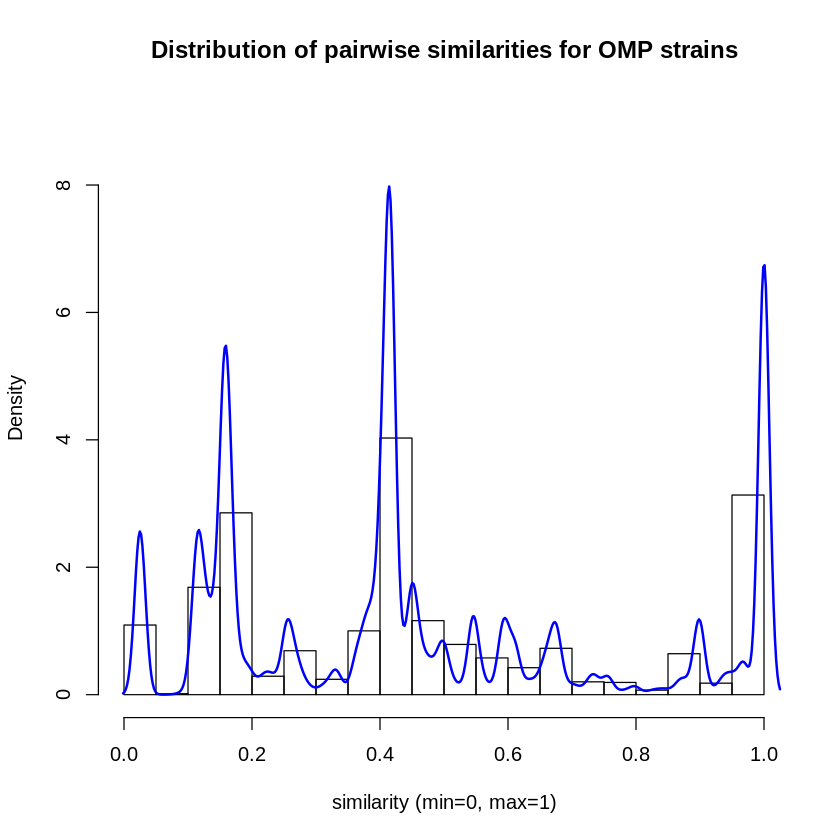

In [88]:
dim(OMP_pairwise_sim_df)
OMP_pairwise_sim_df[c(1,100,1000,10000,100000,1000000,10000000,39787660),] #look at examples of values for similarity
summary(OMP_pairwise_sim_df[,3])
hist(OMP_pairwise_sim_df[,3],main="Distribution of pairwise similarities for OMP strains",xlab="similarity (min=0, max=1)",freq=F,ylim=c(0,9))
lines(density(OMP_pairwise_sim_df[,3]), col="blue", lwd=2)